# 환경 설정

In [7]:
!pip install konlpy 

In [9]:
!pip install --upgrade pip


ERROR: JPype1-0.5.7-cp27-none-win_amd64.whl is not a supported wheel on this platform.


In [13]:
!pip install --user JPype1

In [5]:
!pip install MeCab 

In [15]:
!tar xvf mecab-0.996-ko-0.9.2.tar.gz

x mecab-0.996-ko-0.9.2/
x mecab-0.996-ko-0.9.2/example/
x mecab-0.996-ko-0.9.2/example/example.cpp
x mecab-0.996-ko-0.9.2/example/example_lattice.cpp
x mecab-0.996-ko-0.9.2/example/example_lattice.c
x mecab-0.996-ko-0.9.2/example/example.c
x mecab-0.996-ko-0.9.2/example/thread_test.cpp
x mecab-0.996-ko-0.9.2/mecab-config.in
x mecab-0.996-ko-0.9.2/man/
x mecab-0.996-ko-0.9.2/man/Makefile.am
x mecab-0.996-ko-0.9.2/man/mecab.1
x mecab-0.996-ko-0.9.2/man/Makefile.in
x mecab-0.996-ko-0.9.2/mecab.iss.in
x mecab-0.996-ko-0.9.2/config.guess
x mecab-0.996-ko-0.9.2/README
x mecab-0.996-ko-0.9.2/COPYING
x mecab-0.996-ko-0.9.2/CHANGES.md
x mecab-0.996-ko-0.9.2/README.md
x mecab-0.996-ko-0.9.2/INSTALL
x mecab-0.996-ko-0.9.2/config.sub
x mecab-0.996-ko-0.9.2/configure.in
x mecab-0.996-ko-0.9.2/swig/
x mecab-0.996-ko-0.9.2/swig/Makefile
x mecab-0.996-ko-0.9.2/swig/version.h.in
x mecab-0.996-ko-0.9.2/swig/version.h
x mecab-0.996-ko-0.9.2/swig/MeCab.i
x mecab-0.996-ko-0.9.2/aclocal.m4
x mecab-0.996-ko-

In [17]:
!cd ./mecab-0.996-ko-0.9.2/

In [18]:
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: DECF-628E

 C:\Users\USER\Documents\GitHub\AIFFEL\6. 영화리뷰 텍스트 감성분석하기 디렉터리

2022-01-27  오후 06:30    <DIR>          .
2022-01-27  오후 06:30    <DIR>          ..
2022-01-27  오후 05:37    <DIR>          .ipynb_checkpoints
2022-01-27  오후 05:45    <DIR>          data
2015-02-27  오전 12:40    <DIR>          mecab-0.996-ko-0.9.2
2022-01-27  오후 06:05         1,414,979 mecab-0.996-ko-0.9.2.tar.gz
2022-01-27  오후 06:30            49,144 네이버 영화리뷰 감성분석 도전하기.ipynb
               2개 파일           1,464,123 바이트
               5개 디렉터리  196,702,040,064 바이트 남음


In [25]:
!pip install mecab-ko

In [27]:
!pip install mecab-ko-dic

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for mecab-ko-dic: filename=mecab_ko_dic-1.0.0-py3-none-any.whl size=33424414 sha256=c44427d0284e9a7273b03bde593f6cd87658c2fb92fbb5e499b9ee471a5fc198
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\1e\26\c0\ed4c061096b1480abefe1e2a0356543bf7a38f61c037b69ab6
Successfully built mecab-ko-dic


In [31]:
!pip install mecab-python

In [ ]:
!curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

# 1) 데이터 준비와 확인

In [1]:
import pandas as pd
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import Counter
import os

# 데이터를 읽어봅시다. 
train_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_train.txt')
test_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_test.txt')


train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


# 2) 데이터로더 구성

In [6]:
from konlpy.tag import Mecab

tokenizer = Mecab()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

def load_data(train_data, test_data, num_words=10000):
    # [[YOUR CODE]]
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how = 'any') 
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how = 'any') 
    
    X_train = []
    for sentence in train_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_train.append(temp_X)

    X_test = []
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)
    
    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(10000-4)
    vocab = ['', '', '', ''] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}
        
    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index[''] for word in wordlist]
        
    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))
        
    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index
    
x_train, y_train, x_test, y_test, word_to_index = load_data(train_data, test_data)

# 3) 모델 구성을 위한 데이터 분석 및 가공

In [7]:
print("훈련 샘플 개수: {}, 테스트 개수: {}".format(len(x_train), len(x_test)))

훈련 샘플 개수: 146182, 테스트 개수: 49157


In [8]:
print(x_train[0])  # 1번째 리뷰데이터
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨
print('1번째 리뷰 문장 길이: ', len(x_train[0]))
print('2번째 리뷰 문장 길이: ', len(x_train[1]))

[32, 74, 919, 4, 4, 39, 228, 20, 33, 748]
라벨:  0
1번째 리뷰 문장 길이:  10
2번째 리뷰 문장 길이:  17


In [12]:
word_to_index

{'': 3,
 '.': 4,
 '영화': 5,
 '다': 6,
 '고': 7,
 '하': 8,
 '을': 9,
 '보': 10,
 '..': 11,
 '게': 12,
 ',': 13,
 '!': 14,
 '지': 15,
 '있': 16,
 '없': 17,
 '?': 18,
 '좋': 19,
 '나': 20,
 '었': 21,
 '만': 22,
 '는데': 23,
 '너무': 24,
 '봤': 25,
 '적': 26,
 '안': 27,
 '정말': 28,
 '로': 29,
 '음': 30,
 '것': 31,
 '아': 32,
 '네요': 33,
 '재밌': 34,
 '어': 35,
 '같': 36,
 '점': 37,
 '지만': 38,
 '진짜': 39,
 '했': 40,
 '에서': 41,
 '기': 42,
 '네': 43,
 '않': 44,
 '거': 45,
 '았': 46,
 '수': 47,
 '되': 48,
 '면': 49,
 'ㅋㅋ': 50,
 '말': 51,
 '연기': 52,
 '인': 53,
 '주': 54,
 '내': 55,
 '최고': 56,
 '~': 57,
 '평점': 58,
 '이런': 59,
 '던': 60,
 '어요': 61,
 '할': 62,
 '왜': 63,
 '겠': 64,
 '1': 65,
 '스토리': 66,
 '해': 67,
 '습니다': 68,
 'ㅋㅋㅋ': 69,
 '...': 70,
 '드라마': 71,
 '생각': 72,
 '아니': 73,
 '더': 74,
 '그': 75,
 '싶': 76,
 '사람': 77,
 '듯': 78,
 '때': 79,
 '감동': 80,
 '함': 81,
 '배우': 82,
 '본': 83,
 '까지': 84,
 '뭐': 85,
 '알': 86,
 '만들': 87,
 '내용': 88,
 '볼': 89,
 '감독': 90,
 '보다': 91,
 '라': 92,
 '그냥': 93,
 '재미': 94,
 '시간': 95,
 '지루': 96,
 '중': 97,
 '재미있': 98,
 '년': 

In [15]:
index_to_word = {index:word for word, index in word_to_index.items()}

In [18]:
print(index_to_word[3])     # '' 가 출력됩니다. 
print(word_to_index[''])  # 3 이 출력됩니다.


3


0, 1, 2번 인덱스가 아예 안 정해져 있는 것을 확인함.

In [21]:
word_to_index = {k:(v+1) for k,v in word_to_index.items()}
word_to_index

{'': 4,
 '.': 5,
 '영화': 6,
 '다': 7,
 '고': 8,
 '하': 9,
 '을': 10,
 '보': 11,
 '..': 12,
 '게': 13,
 ',': 14,
 '!': 15,
 '지': 16,
 '있': 17,
 '없': 18,
 '?': 19,
 '좋': 20,
 '나': 21,
 '었': 22,
 '만': 23,
 '는데': 24,
 '너무': 25,
 '봤': 26,
 '적': 27,
 '안': 28,
 '정말': 29,
 '로': 30,
 '음': 31,
 '것': 32,
 '아': 33,
 '네요': 34,
 '재밌': 35,
 '어': 36,
 '같': 37,
 '점': 38,
 '지만': 39,
 '진짜': 40,
 '했': 41,
 '에서': 42,
 '기': 43,
 '네': 44,
 '않': 45,
 '거': 46,
 '았': 47,
 '수': 48,
 '되': 49,
 '면': 50,
 'ㅋㅋ': 51,
 '말': 52,
 '연기': 53,
 '인': 54,
 '주': 55,
 '내': 56,
 '최고': 57,
 '~': 58,
 '평점': 59,
 '이런': 60,
 '던': 61,
 '어요': 62,
 '할': 63,
 '왜': 64,
 '겠': 65,
 '1': 66,
 '스토리': 67,
 '해': 68,
 '습니다': 69,
 'ㅋㅋㅋ': 70,
 '...': 71,
 '드라마': 72,
 '생각': 73,
 '아니': 74,
 '더': 75,
 '그': 76,
 '싶': 77,
 '사람': 78,
 '듯': 79,
 '때': 80,
 '감동': 81,
 '함': 82,
 '배우': 83,
 '본': 84,
 '까지': 85,
 '뭐': 86,
 '알': 87,
 '만들': 88,
 '내용': 89,
 '볼': 90,
 '감독': 91,
 '보다': 92,
 '라': 93,
 '그냥': 94,
 '재미': 95,
 '시간': 96,
 '지루': 97,
 '중': 98,
 '재미있': 99,
 '년':

In [22]:
word_to_index["<PAD>"] = 0
word_to_index["<BOS>"] = 1
word_to_index["<UNK>"] = 2  # unknown
word_to_index["<UNUSED>"] = 3

In [24]:
word_to_index["<PAD>"]

0

In [25]:
index_to_word = {index:word for word, index in word_to_index.items()}

print(index_to_word[1])     # '<BOS>' 가 출력됩니다. 
print(word_to_index['영화'])  # 6 이 출력됩니다. 
print(index_to_word[6])     # 'the' 가 출력됩니다.

<BOS>
6
영화


In [44]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트 벡터로 변환해 주는 함수입니다. 
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다. 
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

# 여러 개의 문장 리스트를 한꺼번에 단어 인덱스 리스트 벡터로 encode해 주는 함수입니다. 
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

In [30]:
print(get_decoded_sentence(x_train[0], index_to_word))
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨

아니 과거   지만 ~~ 좋 아 맨
라벨:  0


In [31]:
total_data_text = list(x_train) + list(x_test)
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

문장길이 평균 :  15.96940191154864
문장길이 최대 :  116
문장길이 표준편차 :  12.843571191092
pad_sequences maxlen :  41
전체 문장의 0.9342988343341575%가 maxlen 설정값 이내에 포함됩니다. 


In [33]:
import tensorflow as tf

In [34]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='post', # 혹은 'pre'
                                                        maxlen=maxlen)

x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='post', # 혹은 'pre'
                                                       maxlen=maxlen)

print(x_train.shape)

(146182, 41)


# 4) 모델 구성 및 validation set 구성

In [35]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 16  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

# model 설계 - 딥러닝 모델 코드를 직접 작성해 주세요.
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 16)          1808      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 16)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 16)          1808      
_________________________________________________________________
global_max_pooling1d (Global (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 8)                 136       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9

In [36]:
# validation set 10000건 분리
x_val = x_train[:10000]   
y_val = y_train[:10000]

# validation set을 제외한 나머지 15000건
partial_x_train = x_train[10000:]  
partial_y_train = y_train[10000:]

print(partial_x_train.shape)
print(partial_y_train.shape)

(136182, 41)
(136182,)


# 5) 모델 훈련 개시

In [37]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
266/266 [==============================] - 5s 6ms/step - loss: 0.4803 - accuracy: 0.7575 - val_loss: 0.3467 - val_accuracy: 0.8489
Epoch 2/20
266/266 [==============================] - 1s 4ms/step - loss: 0.3259 - accuracy: 0.8606 - val_loss: 0.3368 - val_accuracy: 0.8520
Epoch 3/20
266/266 [==============================] - 1s 4ms/step - loss: 0.2960 - accuracy: 0.8765 - val_loss: 0.3375 - val_accuracy: 0.8490
Epoch 4/20
266/266 [==============================] - 1s 4ms/step - loss: 0.2718 - accuracy: 0.8892 - val_loss: 0.3393 - val_accuracy: 0.8508
Epoch 5/20
266/266 [==============================] - 1s 4ms/step - loss: 0.2453 - accuracy: 0.9027 - val_loss: 0.3494 - val_accuracy: 0.8494
Epoch 6/20
266/266 [==============================] - 1s 4ms/step - loss: 0.2170 - accuracy: 0.9170 - val_loss: 0.3752 - val_accuracy: 0.8463
Epoch 7/20
266/266 [==============================] - 1s 4ms/step - loss: 0.1865 - accuracy: 0.9309 - val_loss: 0.3979 - val_accuracy: 0.8449
Epoch 

# 6) Loss, Accuracy 그래프 시각화

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


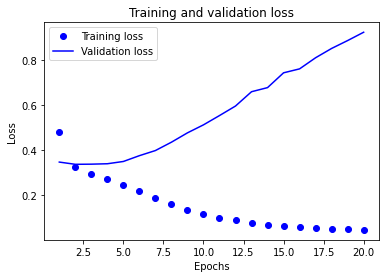

In [39]:
import matplotlib.pyplot as plt

history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 7) 학습된 Embedding 레이어 분석

In [40]:
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 16)


In [41]:
# 학습한 Embedding 파라미터를 파일에 써서 저장합니다. 
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
vectors = model.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [43]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['영화']
vector

array([-0.03382308,  0.04607488,  0.0284392 , -0.01535445, -0.09824665,
       -0.01689787,  0.05391079, -0.00241886, -0.00870675, -0.04029329,
       -0.04143201,  0.03560882,  0.00099896,  0.02882077,  0.01633421,
       -0.02185299], dtype=float32)

# 8) 한국어 Word2Vec 임베딩 활용하여 성능 개선

In [45]:
from gensim.models import KeyedVectors

word2vec_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/GoogleNews-vectors-negative300.bin.gz'
word2vec = KeyedVectors.load_word2vec_format(word2vec_path, binary=True, limit=1000000)
vector = word2vec['영화']
vector     # 무려 300dim의 워드 벡터입니다.

KeyError: "Key '영화' not present"

해당문제는 공부가 더 필요할 것 같다...